In [2]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import os
import math
from matplotlib import pyplot as plt 

blockSize=1024
hopSize=512
fs=44100

In [13]:
fs,x = scipy.io.wavfile.read('../assignment_1/trainData/01-D_AMairena.wav')
x = x/max(x)
x

<ipython-input-13-88eef1bf7426>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,x = scipy.io.wavfile.read('../assignment_1/trainData/01-D_AMairena.wav')


array([-4.82963943e-03, -4.73040026e-03, -4.53192193e-03, ...,
        6.61594443e-05,  3.30797221e-05,  0.00000000e+00])

In [14]:
# BLOCK AUDIO
def block_audio(x,blockSize,hopSize,fs):    
    # allocate memory    
    numBlocks = math.ceil(x.size / hopSize)    
    xb = np.zeros([numBlocks, blockSize])    
    # compute time stamps    
    t = (np.arange(0, numBlocks) * hopSize) / fs   
    x = np.concatenate((x, np.zeros(blockSize)),axis=0)    
    for n in range(0, numBlocks):        
        i_start = n * hopSize        
        i_stop = np.min([x.size - 1, i_start + blockSize - 1])        
        xb[n][np.arange(0,blockSize)] = x[np.arange(i_start, i_stop + 1)]    
    return (xb,t)


In [80]:
def calc_stft(xb):
    stft = []
    for block in xb:
        stft.append(np.log10(np.abs(np.fft(xb))))
    stft = np.array(stft)
    return stft

In [15]:
xb,t = block_audio(x, blockSize, hopSize, fs)

In [88]:
test_aud = np.sin(2*np.pi*1000*np.arange(1 * fs)/fs)

In [101]:
import librosa
librosa.zero_crossings(test_blocked).shape

(12, 8000)

In [95]:
test_blocked,t = block_audio(test_aud,8000, 4000, fs)
zcr_test=extract_zerocrossingrate(test_blocked)
zcr_test

array([363, 363, 363, 362, 363, 362, 363, 363, 363, 363, 185,   4])

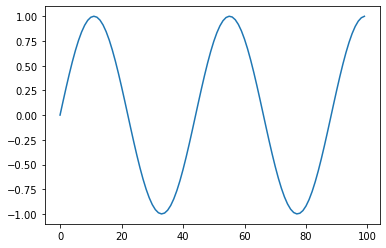

In [86]:
plt.plot(test_aud[0:100])

# Section A

## Q1: 
### Implement functions for 5 audio features: extract_spectral_centroid(xb, fs), extract_rms(xb), extract_zerocrossingrate(xb), extract_spectral_crest(xb), extract_spectral_flux(xb). xb is a matrix of blocked audio data (dimension NumOfBlocks X blockSize, see assignment 1), fs is the sample rate. Implement each of these functions in the default formulation from the text book/slides. Note that for the spectral features, you have to apply a window function to each block. Use the hann window from a previous in-class exercise for this purpose. To avoid feature definition ambiguities:
    1. Spectral Centroid in Hz, compute from the magnitude spectrum (not power spectrum)
    2. RMS in dB, truncated at -100dB
    3. all others as defined in the book

## Spectral Centroid

In [ ]:
def extract_spectral_centroid(xb, fs):
    centroid = []

    centroid=np.array(centroid)
    return centroid

## RMS

In [50]:
def extract_rms(xb):
    rms=[]
    for block in xb:
        r = np.sqrt(np.sum(block**2)/xb.shape[0])
        if r <= 0.00001: # Done to handle case when rms is 0 (for a block of all zeros
            r = 0.00001
        rms.append(r)
    rms=np.array(rms)
    return 20*np.log10(rms)#rms,20*np.log10(rms) # What is reference value to convert to dB? Is it 1?

### Testing rms

0.0008019605811365145


Text(0.5, 1.0, 'Signal vs RMS')

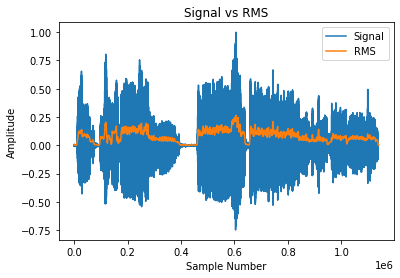

In [76]:
def extract_rms_raw(xb):
    rms=[]
    for block in xb:
        r = np.sqrt(np.sum(block**2)/xb.shape[0])
        if r <= 0.00001: # Done to handle case when rms is 0 (for a block of all zeros
            r = 0.00001
        
        rms.append(r)
    rms=np.array(rms)
    return rms#rms,20*np.log10(rms) # What is reference value to convert to dB? Is it 1?
rms = extract_rms_raw(xb)
print(rms.min())
t_rms = np.arange(0,xb.shape[0])*hopSize
plt.plot(x)
plt.plot(t_rms,rms)

plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend(['Signal','RMS'])
plt.title('Signal vs RMS')

## ZCR

In [128]:
def extract_zerocrossingrate(xb):
    zcr=[]
    for block in xb:
        zero_crossings = np.sum(np.abs(np.diff(np.sign(block)))) / block.shape[0] #np.nonzero(np.diff(block > 0))[0].size
        zcr.append(zero_crossings)
    zcr = np.array(zcr)
    return zcr

### Testing ZCR

Text(0.5, 1.0, 'Signal vs Normalized ZCR')

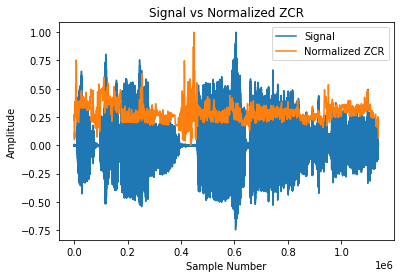

In [129]:
def extract_zerocrossingrate_test(xb):
    zcr1=[]
    zcr2=[]
    for block in xb:
        zero_crossings = np.sum(np.abs(np.diff(np.sign(block)))) / block.shape[0] #np.nonzero(np.diff(block > 0))[0].size
        zcr1.append(zero_crossings)
        zcr2.append(0.5 * np.mean(np.abs(np.diff(np.sign(block)))))
    zcr1 = np.array(zcr1)
    zcr2=np.array(zcr2)
    return zcr1,zcr2

zcr1,zcr2 = extract_zerocrossingrate_test(xb)
zcr_plt = zcr1/max(zcr1)
t_zcr = np.arange(0,xb.shape[0])*hopSize
plt.plot(x)
plt.plot(t_zcr,zcr_plt)

plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend(['Signal','Normalized ZCR'])
plt.title('Signal vs Normalized ZCR')

## Spectral Crest

In [ ]:
def extract_spectral_crest(xb):
    crest = []


    crest = np.array(crest)
    return crest

## Spectral Flux

In [ ]:
def extract_spectral_flux(xb):
    flux = []


    flux = np.array(flux)
    return(flux)

## Q2:
### Implement a function: [features] = extract_features(x, blockSize, hopSize, fs) This function serves as a wrapper for feature extraction. It will take a single-channel audio vector x as input, blocks the audio with the given block size and hop size using block_audio(), calls each of the feature extractor functions implemented above and returns a 5 X NumOfBlocks dimensional feature matrix.

In [ ]:
def extract_features(x, blockSize, hopSize, fs):
    features=[]


    features = np.array(features)
    return features

## Q3:
### Implement a function: [aggFeatures] = aggregate_feature_per_file(features). This function aggregates the feature matrix returned by extract_features(), aggregates the features across blocks using mean and standard deviation and returns a  10x1 aggregated feature matrix

In [ ]:
def aggregate_feature_per_file(features):
    agg_features = []


    agg_features=np.array(agg_features)
    return agg_features

## Q4:
### Implement a  function: [featureData] = get_feature_data(path, blockSize, hopSize) This function loops over all files contained within a folder that is pointed to by the path argument. The function will then successively call the extract_features() and aggregate_feature_per_file() functions and return a 10xN feature matrix of which contains the aggregated features for N audio files contained in the directory.

In [ ]:
def get_feature_data(path, blockSize, hopSize):

    return ''


# Section B:
## Q1: 
### Implement a  function: [normFeatureMatrix] = normalize_zscore(featureData) This function applies the z-score normalization scheme to the input feature matrix. The z-score normalization normalizes each feature to a zero mean and unit standard deviation across the entire dataset. Be careful with the dimensions.

In [ ]:
def normalize_zscore(featureData):
    normalized_matrix=[]

    normalized_matrix = np.array(normalized_matrix)
    return normalized_matrix